In [39]:
import matplotlib.pyplot as plt 
import scipy.misc
import json

import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation, merge, GlobalAveragePooling2D
from keras.layers.merge import Add, Multiply, Average, Maximum, Concatenate, Dot
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from scipy.misc import imread
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from plotly import __version__
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) # connect to notebook

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print(kv)
print(sv) 
print(mv) 
print(nv) 

2.0.7
0.19.0
2.0.0
1.12.1


In [2]:
# Local files
import utils_diagnosis
import utils_python3
#reload(utils_python3)

# Data

### Config

In [3]:
trained_model_dir = '/home/ubuntu/data/sar/training_crops_20170829/trained_models/deployed_models/'
train_dir = '/home/ubuntu/data/sar/training_crops_20170829/train/50x50/'
valid_dir = '/home/ubuntu/data/sar/training_crops_20170829/validate/50x50/'

In [4]:
model = load_model(trained_model_dir+'1.1-as_mph-Python3_FCN_50x50_adam_more_dropout__full-png.h5')

In [5]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_19 (Conv2D)               (None, 50, 50, 32)    320         input_7[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_19[0][0]                  
____________________________________________________________________________________________________
conv2d_20 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_13[0][0]           
___________________________________________________________________________________________

### Add dist2land feature and tif images

In [6]:
train_crops, train_filename, train_feature, train_class, \
valid_crops, valid_filename, valid_feature, valid_class = utils_python3.add_dist2land_training_crops_20170829_multiclass("50x50")

In [7]:
print("training crops:", len(train_crops))
print("training features:", len(train_feature))
print("validation crops:", len(valid_crops))
print("validation features:", len(valid_feature))
print(type(train_crops), type(train_crops[0]), train_crops[0].shape)

training crops: 10188
training features: 10188
validation crops: 1503
validation features: 1503
<class 'list'> <class 'numpy.ndarray'> (50, 50)


In [8]:
# Reshape for keras format
np_train_class = np.array(train_class)
np_train_filename = np.array(train_filename)
np_train_crops = np.array(train_crops)
np_train_feature = np.array(train_feature)

np_valid_class = np.array(valid_class)
np_valid_filename = np.array(valid_filename)
np_valid_crops = np.array(valid_crops)
np_valid_feature = np.array(valid_feature)

np_train_crops = np.expand_dims(np_train_crops, axis=3)
np_train_feature = np.expand_dims(np_train_feature, axis=1)

np_valid_crops = np.expand_dims(np_valid_crops, axis=3)
np_valid_feature = np.expand_dims(np_valid_feature, axis=1)

In [9]:
print(np_train_crops.shape)
print(np_train_feature.shape)
print(np_train_class.shape)
print(np_valid_crops.shape)
print(np_valid_feature.shape)
print(np_valid_class.shape)

(10188, 50, 50, 1)
(10188, 1)
(10188, 3)
(1503, 50, 50, 1)
(1503, 1)
(1503, 3)


# Diagnosis

In [21]:
preds = model.predict([np_valid_crops, np_valid_feature], batch_size=32)
print(preds.shape)
preds

(1503, 3)


array([[  9.99990702e-01,   9.18540718e-06,   1.05744263e-07],
       [  9.99997854e-01,   8.14747239e-07,   1.28324507e-06],
       [  9.99381542e-01,   5.95996898e-05,   5.58920903e-04],
       ..., 
       [  2.03104946e-06,   1.46828361e-05,   9.99983311e-01],
       [  1.07121139e-06,   4.87498255e-08,   9.99998927e-01],
       [  3.45047168e-03,   4.76177142e-04,   9.96073365e-01]], dtype=float32)

In [22]:
y_pred = list(np.argmax(preds, axis=1))
print(len(y_pred))
y_pred

1503


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [28]:
y_true = list(np.argmax(np_valid_class, axis=1))
print(len(y_true))
y_true

1503


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


[[490   4   7]
 [  0 501   0]
 [  4  11 486]]
Confusion matrix, without normalization
[[490   4   7]
 [  0 501   0]
 [  4  11 486]]


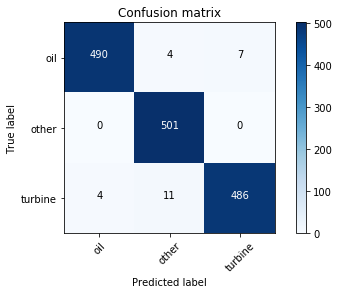

In [33]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

utils_diagnosis.plot_confusion_matrix(cm, ['oil', 'other', 'turbine'])

In [36]:
# Number false positives = sum vertical (non-diagonal) rows =
print("Number 'oil_and_gas_infrastructure' false positives = {}".format(sum(cm[1:,0])))
print("Number 'turbine' false positives = {}".format(sum(cm[:2,2])))

print("\n")

# Number false negatives = sum horizontal (non-diagonal) rows =
print("Number 'oil_and_gas_infrastructure' false negatives = {}".format(sum(cm[0, 1:])))
print("Number 'turbine' false negatives = {}".format(sum(cm[2, :2])))

Number 'oil_and_gas_infrastructure' false positives = 4
Number 'turbine' false positives = 7


Number 'oil_and_gas_infrastructure' false negatives = 11
Number 'turbine' false negatives = 15


In [40]:
utils_diagnosis.kari_plot(preds, valid_filename)

TypeError: range(0, 1503) is not JSON serializable

In [47]:
print(as.preds[501])

[  1.67588499e-09   1.00000000e+00   1.97219840e-09]


Number of samples found: 459
[  9.99909163e-01   1.82410859e-05   7.25954524e-05]
/home/ubuntu/data/sar/training_crops_20170829/validate/50x50/oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20170317T061244_20170317T061309_015728_019E38_145D_terrain_correction_12.png


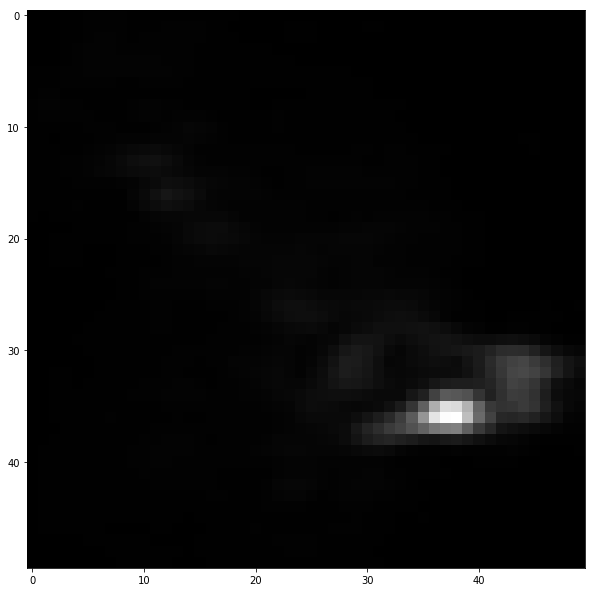

In [44]:
utils_diagnosis.display_random_good_prediction(preds[:501,],
                                               valid_filename[:501],
                                               valid_dir + 'oil_and_gas_infrastructure',
                                               0)